In [64]:
import astropy.constants as const
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def alpha_A(T):
    T_K = T/u.K
    return 2.065 * 10**-11 * T_K**(-1/2) * ( 6.414 - 1/2 * np.log(T_K) + 8.68 * 10**-3 *T_K**(1/3)) * u.cm**3 / u.s

In [99]:
from scipy.integrate import quad

def alpha_1(T):
    nu0 = 3.288465 * 10**15 * u.Hz
    factor = nu0**3 *8 * np.pi / const.c**2 * (const.h**2/(2 * np.pi * const.m_e * const.k_B))**(3/2) * 6.30* 10**-18 * u.cm**2
    def I(nu2):
        return np.exp(- const.h * nu2 *nu0/ (const.k_B * T)) * (1 + nu2)**-1
    integrated = quad(I,0,np.inf)[0]
    return (factor * (1/T**(3/2)) * integrated).to(u.cm**3/u.s)

In [100]:
def alpha_B(T):
    return alpha_A(T)-alpha_1(T)

In [119]:
from scipy.integrate import quad

def N_dot(T_star,R_star):
    nu0 = 3.288465 * 10**15 * u.Hz
    factor = nu0**3 *8 * np.pi**2 / const.c**2
    def I(nu3):
        return nu3**2 / (np.exp(const.h * nu3 *nu0/ (const.k_B * T_star))-1)
    integrated = quad(I,1,np.inf)[0]
    return (factor * (R_star**2) * integrated).to(1/u.s)
    

In [120]:
T_star = 40000 * u.K
R_star = 10**12.1 * u.cm
N_dot(T_star,R_star)

<Quantity 3.99985171e+49 1 / s>

In [90]:
(R_star/const.R_sun).decompose()

<Quantity 18.09580871>

In [91]:
np.log10(40000)

4.6020599913279625

In [92]:
r_min = 10**18.477121 * u.cm
r_min.to('pc')

<Quantity 0.97223322 pc>

In [93]:
10**.9

7.943282347242816

In [94]:
15/(np.pi**4)

0.15398973382026507

In [122]:
N_tot = const.sigma_sb * T_star**4 * 4 * np.pi * R_star**2 / (5 * const.k_B * T_star)
N_tot.decompose()

<Quantity 1.04700387e+50 1 / s>

In [130]:
10**4.7

50118.72336272725

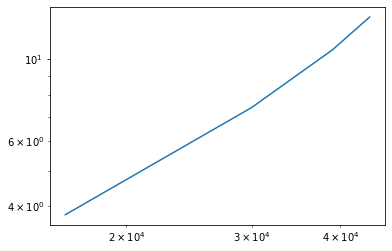

In [142]:
T = [44000,39000,30000,16400]
R = [13,10.6,7.4,3.8]
plt.plot(T,R)
plt.xscale('log')
plt.yscale('log')

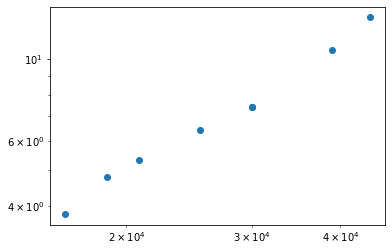

In [143]:
T += [30000,25400,20800,18800]
R += [7.4,6.42,5.33,4.8]
plt.scatter(T,R)
plt.xscale('log')
plt.yscale('log')

In [144]:
T.sort()

In [145]:
T

[16400, 18800, 20800, 25400, 30000, 30000, 39000, 44000]

In [146]:
R.sort()
R

[3.8, 4.8, 5.33, 6.42, 7.4, 7.4, 10.6, 13]

In [148]:
np.log10(10.6 * const.R_sun / u.cm)

<Quantity 11.86772787>

In [168]:
T_stars = np.array([16400, 18800, 20800, 25400, 30000, 39000, 40850, 44000])*u.K
R_stars = np.array([3.8, 4.8, 5.33, 6.42, 7.4, 10.6,11.2, 13])*const.R_sun

In [169]:
np.log10(R_stars / u.cm)

<Quantity [11.4222056 , 11.52366324, 11.56914921, 11.64995703, 11.71165372,
           11.86772787, 11.89164003, 11.95636536]>

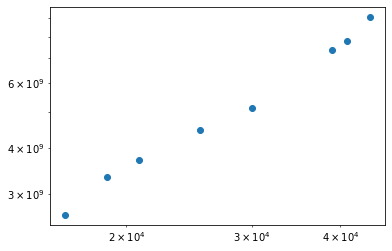

In [156]:
plt.scatter(T_stars ,R_stars )
plt.xscale('log')
plt.yscale('log')

In [160]:
"diuhd3yhd=23y".find('hd=12')

-1

In [167]:
"{:d}".format(33765)

'33765'

In [173]:
def depth(T_star,R_star,n,T):
    R = (3 * N_dot(T_star,R_star) /(4 * np.pi * n**2 * alpha_B(T) ) + (10**18.477121 * u.cm)**3)**(1/3)
    depth = R - (10**18.477121 * u.cm)
    return depth

In [174]:
T_star = 40000 * u.K
R_star = 10**12.1 * u.cm
n = 1e2 * u.cm**-3
T = 10000 * u.K
depth(T_star,R_star,n,T)

/usr1/student/premv/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity 1.25250174e+19 cm>

In [86]:
n = 10**np.linspace(0,3.75,16) * u.cm**-3
T = 8000 * u.K
depth_anal = depth(n,T)

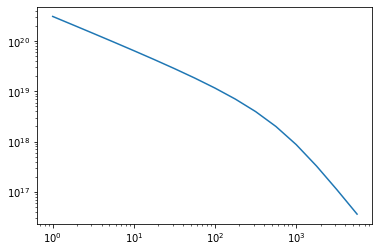

In [87]:
plt.plot(n,depth_anal)
plt.xscale('log')
plt.yscale('log')

In [175]:
ls

analytical.py     cloudy_files/  __pycache__/         report/
assignment-2.pdf  other.ipynb    python-cloudy.ipynb


In [176]:
import pandas as pd

In [185]:
T = float(np.genfromtxt('cloudy_files/vary_hden/toy_T=40000_hden=0.00_ISM_metals=0.50_hii_temp.avr'))

In [186]:
T

8972.491

In [190]:
df = pd.DataFrame({'a':[]})

In [193]:
df['a'].append(2)

TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid